<a href="https://colab.research.google.com/github/joaoavelaar/machine-learning/blob/main/Statsmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#João Avelar
# Para visualização de gráficos
%matplotlib inline
from pylab import *

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(9876789)

In [ ]:
# Criando dados artificiais
nsample = 100
x = np.linspace(0, 9, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [ ]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.335e+06
Date:                Fri, 16 Jun 2023   Prob (F-statistic):          2.43e-235
Time:                        18:03:09   Log-Likelihood:                -134.79
No. Observations:                 100   AIC:                             275.6
Df Residuals:                      97   BIC:                             283.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1876      0.278      4.270      0.0

In [ ]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.1875799   0.06390394 10.00107688]
R2:  0.9999854588412793


In [ ]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     232.2
Date:                Fri, 16 Jun 2023   Prob (F-statistic):           8.80e-28
Time:                        18:11:59   Log-Likelihood:                -34.271
No. Observations:                  50   AIC:                             76.54
Df Residuals:                      46   BIC:                             84.19
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5233      0.026     19.886      0.0

In [ ]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.52334809  0.37447144 -0.0223435   4.91092107]
Standard errors:  [0.02631805 0.10345934 0.00231074 0.17064722]
Predicted values:  [ 4.35233362  4.80205743  5.21991591  5.5855007   5.8857687   6.11718504
  6.28630383  6.40869134  6.5063685   6.60419295  6.72577498  6.88959841
  7.1059838   7.37539275  7.68835211  8.02701036  8.36807059  8.6866181
  8.96021381  9.17258095  9.31627929  9.39392752  9.41777306  9.40767978
  9.38786447  9.38291808  9.41376548  9.49422757  9.62875055  9.81167543
 10.02816778 10.25665496 10.47237048 10.65142305 10.77472185 10.83111309
 10.81921257 10.74763307 10.63356931 10.49997292 10.37178152 10.27182158
 10.21705804 10.21580708 10.26636975 10.35731113 10.46933904 10.57847369
 10.6599875  10.69246777]


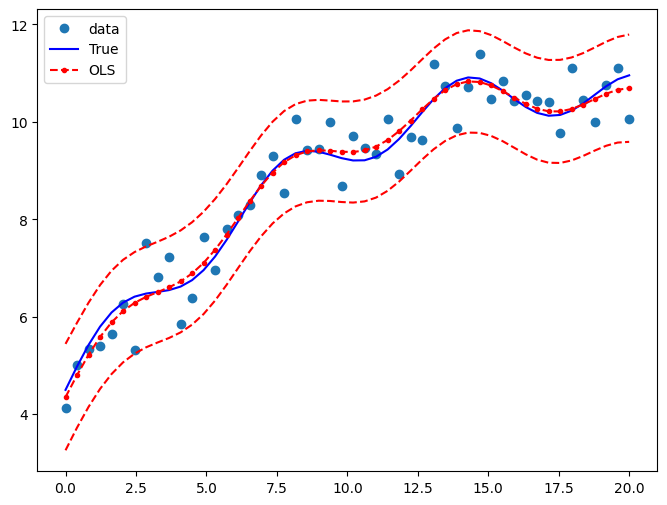

In [ ]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')

In [ ]:
from statsmodels.tsa.arima_process import arma_generate_sample


In [ ]:
# Gerando dados
np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])

In [ ]:
# Parâmetros
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]
nobs = 250
y = arma_generate_sample(arparams, maparams, nobs)